<i style= 'color: green; font-size:1.5em'> Pamela Jaramillo
<!---line--->
<i style= 'color: green; font-size:1em'> Práctica 2

# Lab assignment: dogs VS cats

<table><tr>
    <td><img src="img/doge.jpg" style="width:400px;height:400px;"></td>
    <td><img src="img/cat.jpg" style="width:400px;height:400px;"></td>
</tr></table>

In this assignment we will face an image classification problem, trying to tell apart images of dogs and images of cats. The final battle begins! And to do so we will use a Deep Learning approach.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.
</font>

***

<img src="img/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
This is an advanced exercise that can help you gain a deeper knowledge into the topic. Good luck!</font>

***

To avoid missing packages and compatibility issues you should run this notebook under one of the [recommended Deep Learning environment files](https://github.com/albarji/teaching-environments/tree/master/deeplearning), or make use of [Google Colaboratory](https://colab.research.google.com/). If you use Colaboratory make sure to [activate GPU support](https://colab.research.google.com/notebooks/gpu.ipynb).

The following code will embed any plots into the notebook instead of generating a new window:

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Data processing

The images to use in this assignment are available [here](https://drive.google.com/open?id=105jGDrjEgxx2W2gYhFF8Mbf1J9qJeDPm) as a zip file. Download the data package and extract it into a folder in your computer. It is recommended to run this section of the notebook in your machine, as you might find memory issues when working in Google Colaboratory. Later on we will see how to load the processed data into Colab.

Data is structured under two folders, *train* and *test*. You are only allowed to use the *test* data to measure the performance of your model **after** you have finished training. Both *train* and *test* folders contain one subfolder per class (*cats* and *dogs*).

The recommended way to load an image from disk is to use the *imread* function from the *scikit-image* library. For example:

In [0]:
from skimage.io import imread

image = imread("./img/sample.jpg")

This returns the image as 3-dimensional numpy matrix, containing the value of intensity of every pixel in each row, column and color channel.

In [0]:
image.shape

(499, 367, 3)

We can visualize the loaded image using

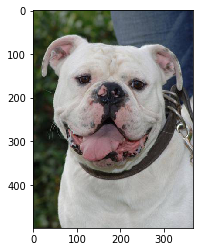

In [0]:
plt.imshow(image)

The dataset includes 20000 training images and 5000 test images, each image at a different resolution. Loading all this data at once requires too much memory, so we will need to **resize** each image to a smaller, common size as we load them from disk. We can do so by again making use of a *scikit-image* function. For example:

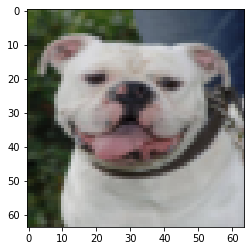

In [0]:
from skimage.transform import resize

size = 64
smallimage = resize(image, (64, 64, 3), mode="reflect")  # 64 x 64 pixels, 3 color channels
plt.imshow(smallimage)

In [0]:
smallimage.shape

(64, 64, 3)

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    
Perform the following tasks to prepare the data:
- Build a numpy array *X_train* containing one entry for each training image in the data. Each entry must contain the 3-dimensional matrix of pixels corresponding to an image. Make sure to scale down each image to a common size
- Normalize *X_train* so that pixels follow a distribution lying in the range [0, 1]
- Build a corresponding array *Y_train* with the class of each training image (0 for cats and 1 for dogs).
- Randomly shuffle the data. Make sure you shuffle both *X_train* and *Y_train* using the same permutation, so you don't lose track of the class of each training pattern.

- Repeat the whole procedure again to generate *X_test* and *Y_test* matrices for the test data.
</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
- Take advantage of the *glob* package to generate the filename lists for the indoor and outdoor subfolders.
- Since you need to repeat the procedure both for training and test data, it would be useful to implement a function that performs all the data loading and transforming steps.

</font>

***

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
from skimage.io import imread
from skimage.transform import resize
from os import listdir
from matplotlib import image
import glob
import pandas as pd
import numpy as np
import random
import pickle


In [0]:
def charge(dir):
    x = list()
    for filename in listdir(dir):
        img_data = image.imread(dir + '/' + filename)
        img_small = resize(img_data, (128, 128, 3), mode="reflect")
        x.append(img_small)
    return x

In [0]:
cats_train= charge('catsVSdogs/train/cats')
dogs_train= charge('catsVSdogs/train/dogs')
cats_test= charge('catsVSdogs/test/cats')
dog_test= charge('catsVSdogs/test/dogs')

In [0]:
len(cats_train)

10000

AxesImage(54,36;334.8x217.44)


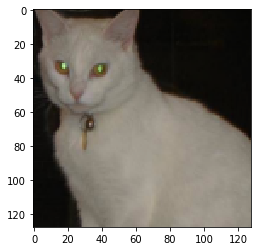

In [0]:
print(plt.imshow(cats_train[24]))

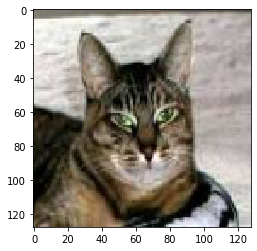

In [0]:
plt.imshow(cats_train[1024])

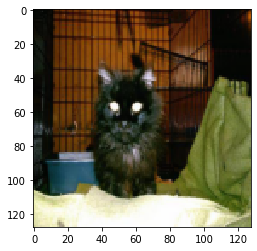

In [0]:
plt.imshow(cats_train[2224])

In [0]:
print(len(dogs_train),len(cats_test),len(dog_test))

10000 2500 2500


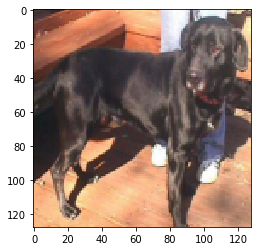

In [0]:
plt.imshow(dogs_train[5890])

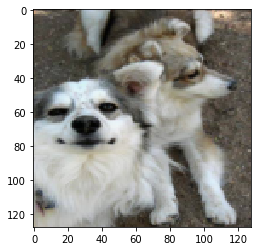

In [0]:
plt.imshow(dog_test[1345])

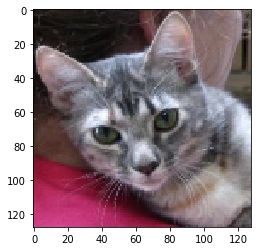

In [0]:
plt.imshow(cats_test[2345])

In [0]:
y_cats=[0]*10000
y_dogs=[1]*10000

In [0]:
Y_train=y_cats+y_dogs
X_train=cats_train+dogs_train

In [0]:
len(X_train)

20000

In [0]:
len(Y_train)

20000

In [0]:
X_Y_train=list(zip(X_train,Y_train))
random.shuffle(X_Y_train)
X_train, Y_train =zip(*X_Y_train)

1


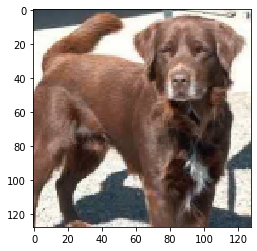

In [0]:
plt.imshow(X_train[23])
print(Y_train[23])

0


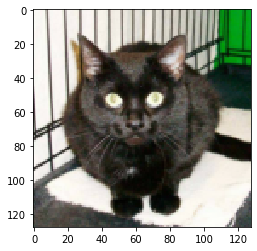

In [0]:
plt.imshow(X_train[8363])
print(Y_train[8363])

0


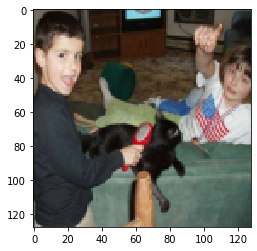

In [0]:
plt.imshow(X_train[12345])
print(Y_train[12345])

In [0]:
y2_cats=[0]*2500
y2_dogs=[1]*2500

In [0]:
Y_test=y2_cats+y2_dogs
X_test=cats_test+dog_test

In [0]:
print(len(Y_test),len(X_test))

5000 5000


In [0]:
X_Y_test=list(zip(X_test,Y_test))
random.shuffle(X_Y_test)
X_test, Y_test=zip(*X_Y_test)

1


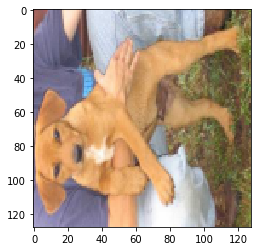

In [0]:
plt.imshow(X_test[23])
print(Y_test[23])

0


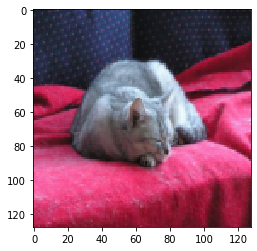

In [0]:
plt.imshow(X_test[2687])
print(Y_test[2687])

In [0]:
from sklearn.preprocessing import MinMaxScaler as MMS

In [0]:
scaler= MMS()

In [0]:
X_train_array= np.array(X_train)
X_test_array=np.array(X_test)

In [0]:
print(X_train_array.min(),X_test_array.min(),X_train_array.max(),X_test_array.max())

0.0 0.0 1.0 1.0


In [0]:
with open("X_train.txt", "wb") as fp:   
    pickle.dump(X_train, fp)

In [0]:
with open("X_train.txt", "rb") as fp:   
    X_train = pickle.load(fp)

In [0]:
with open("Y_train.txt", "wb") as fp:   
    pickle.dump(Y_train, fp)

In [0]:
with open("Y_train.txt", "rb") as fp:   
    Y_train = pickle.load(fp)

In [0]:
with open("X_test.txt", "wb") as fp:   
    pickle.dump(X_test, fp)

In [0]:
with open("X_test.txt", "rb") as fp:   
    X_test = pickle.load(fp)

In [0]:
with open("Y_test.txt", "wb") as fp:   
    pickle.dump(Y_test, fp)

In [0]:
with open("Y_test.txt", "rb") as fp:   
    Y_test = pickle.load(fp)

If everything has been properly loaded both X_train and Y_train lists should have equal length, and the same should happen for the pair X_test and Y_test.

In [0]:
print("X_train size", len(X_train))
print("Y_train size", len(Y_train))
print("X_test size", len(X_test))
print("Y_test size", len(Y_test))

X_train size 20000
Y_train size 20000
X_test size 5000
Y_test size 5000


### Creating a backup of the processed data

Since the data processing above can be slow, we can save time in future sessions by saving the `X_train, Y_train, X_test, Y_test` variables we created above in a numpy format. To do so, run

In [0]:
datafile = "data.npz"  # Change here the location for the processed data

In [0]:
import numpy as np

np.savez(datafile, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test)

### Loading processed data from the backup

Upon restarting this notebook you can load the preprocessed data by running

In [0]:
datafile = "/tmp/data.npz"  # The same file you used to save the data

In [0]:
import numpy as np

data = np.load(datafile)

In [0]:
X_train = data['X_train']
X_test = data['X_test']
Y_train = data['Y_train']
Y_test = data['Y_test']

#### Note on loading data into Google Colab

To load data into a Google Colaboratory you will need to upload the processed data file into your Google Drive account. After that, in the Colab notebook you can run 

```
from google.colab import drive
drive.mount('/content/drive')
```

to connect all the contents in your Google Drive to the folder `/content/drive`. Then you should be able to run the loading cells above to get the data. For example, if you uploaded the data file directly to the home folder in Google Drive, you should be able to access it using the path `/content/drive/My Drive/data.npz`.

In [0]:
import numpy as np


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
datafile = "/content/drive/My Drive/data.npz"
data = np.load(datafile)


In [0]:
X_train = data['X_train']
X_test = data['X_test']
Y_train = data['Y_train']
Y_test = data['Y_test']

In [0]:
X_train_array= np.array(X_train)

In [0]:
X_train_array.max()
X_train_array.shape
X_train_array.min()

In [0]:
X_test_array=np.array(X_test)

## Basic deep model

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***
<font color=#ad3e26>
Create a deep network that achieves at least a 70% of accuracy in the test set. Make use of the layers you seem fit for problem, but you should include at least one layer that makes use of the spatial properties of the images. You cannot use the test data for fitting the network, but you can use it to check the final performance of different network architectures, and select the architecture performing best.</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
If you are unable to attain the required 70% of accuracy, or your accuracy is too close to 100%, review the following checklist:
- Have you mixed training and test data?
- Have the values of the pixels been normalized?
- Have you compiled the model with a loss function appropriate for **binary** classification?
- Have you used ReLU units in the hidden layers? Have you used sigmoid or softmax layers in the output layer?

***

In [2]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.constraints import maxnorm
from keras.models import model_from_json
import os

Using TensorFlow backend.


In [0]:
img_rows = 128
img_cols = 128
kernel_size = 3 
pool_size = 2 

model = Sequential()

model.add(Convolution2D(100, 
                        (kernel_size, kernel_size),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Convolution2D(200, (kernel_size, kernel_size)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Convolution2D(300, (kernel_size, kernel_size)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(50,kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    X_train_array, 
    Y_train, 
    batch_size=128, 
    epochs=30, 
    verbose=1)

In [230]:
# save the model
model_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model.h5")
print("Saved model to disk")

NameError: ignored

In [231]:
# load json and create model
json_file = open('/content/drive/My Drive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/model.h5")
print("Loaded model from disk")


Loaded model from disk


<a style= 'color:blue'>Evaluating Model on train and test

In [0]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [235]:
train_acc = loaded_model.evaluate(X_train_array, Y_train, verbose=0)
test_acc = loaded_model.evaluate(X_test_array, Y_test, verbose=0)
print(f'Train Accuracy: {train_acc[1]*100}%,Test Accuracy: {test_acc[1]*100}%')
print(f'Train Loss: {train_acc[0]},Test Loss: {test_acc[0]}')

Train Accuracy: 91.835%,Test Accuracy: 85.92%
Train Loss: 0.20723963731527328,Test Loss: 0.3295958641111851


<a style= 'color:blue'> MODEL SUMMARY

In [232]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 100)     2800      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 100)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 100)     0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 100)     400       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 200)     180200    
_________________________________________________________________
activation_2 (Activation)    (None, 124, 124, 200)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 200)      

## Improving the network

<img src="img/pro.png" height="80" width="80" style="float: right;"/>

***

<font color=#259b4c>
    
You can further improve your results by applying one or more of the following strategies:
- Keep apart a portion of the training data as a **validation set**. Then use an <a href="https://keras.io/callbacks/#earlystopping">**EarlyStopping strategy**</a> to monitor the loss of these validation data, and stop when training when after a number of iterations such loss has not decreased.
- Use **image augmentation techniques** to artifically create new training images. To do so, you can make use of <a href="https://keras.io/preprocessing/image/">ImageDataGenerator</a> in Keras.
- Make use of a pre-trained large network, building your network on top of it. You can find some examples in the [Keras Applications](https://keras.io/applications/) page. Be careful when freezing pre-trained networks that include [BatchNormalization layers](http://blog.datumbox.com/the-batch-normalization-layer-of-keras-is-broken/), such as ResNet.
- Make use of **metamodelling techniques** to select the best architecture parameters for the networks. You can use scikit-learn methods GridSearchCV or RandomSearchCV. You can do those by using the <a href="https://keras.io/scikit-learn-api/">KerasClassifier</a> wrapper. Even better, you can mix KerasClassifier with an advanced search method such as [BayesSearch](https://scikit-optimize.github.io/#skopt.BayesSearchCV), included in the [scikit-optimize](https://scikit-optimize.github.io/) library. If you get memory problems try to free GPU memory before building each network by [clearing the tensorflow session](https://stackoverflow.com/questions/50895110/what-do-i-need-k-clear-session-and-del-model-for-keras-with-tensorflow-gpu).

If you correctly use these techniques you should be able to improve your model. With some effort it is possible to up to a 90% test accuracy. Try to do your best!</font>

***

<a style= 'color:blue'>We have improved the model using pretrained model VGG16 frizing all the convolutional layers and adding 3 more dense layers. Also we included in the train early stopping to know the correct epochs that obtain the better accuracy and not overfit.

In [0]:
from __future__ import print_function
import os
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.models import model_from_json
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from sklearn.datasets import make_moons
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model

In [12]:
#Chargin the VGG16 trainin model, buy without the top layer and the last dense layers, 
#also specifying here the shape of our photos that the model will receive
model_vgg16= keras.applications.vgg16.VGG16(include_top=False, input_shape=(128, 128, 3))





58892288/58889256 [==============================] - 2s 0us/step








In [13]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

<a style= 'color:blue'>Creating a sequential model and adding all the convolultional layers of the VGG16


In [0]:
model1=Sequential()
for layer in model_vgg16.layers:
  model1.add(layer)

In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)      

<a style= 'color:blue'> Drop out the last dense layer, the original model was created to predict 10k images, we only have 2, so we have to delete that layer to add a new one with only one output neuron

In [24]:
model1.layers.pop()

In [36]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)      

<a style= 'color:blue'>  Frizing all the conv layers

In [0]:
for layer in model1.layers:
  layer.trainable=False

<a style= 'color:blue'> Adding new layers to the model, include dropout to prevent overfitting and our last layer with 1 output


In [0]:
model1.add(Flatten())
model1.add(Dense(352))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(352))
model1.add(Activation('relu'))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [18]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)      

In [0]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
                  metrics=['accuracy'])

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('/content/drive/My Drive/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [29]:
entrenamiento=model1.fit(X_train_array,Y_train,batch_size=128,validation_data=(X_test_array, Y_test), 
    epochs=200, 
    verbose=1,
    callbacks=[es,mc])

Train on 20000 samples, validate on 5000 samples
Epoch 1/200
20000/20000 [==============================] - 26s 1ms/step - loss: 0.3695 - acc: 0.8332 - val_loss: 0.2542 - val_acc: 0.8906

Epoch 00001: val_acc improved from -inf to 0.89060, saving model to /content/drive/My Drive/best_model.h5
Epoch 2/200
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2673 - acc: 0.8851 - val_loss: 0.2401 - val_acc: 0.8942

Epoch 00002: val_acc improved from 0.89060 to 0.89420, saving model to /content/drive/My Drive/best_model.h5
Epoch 3/200
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2431 - acc: 0.8973 - val_loss: 0.2433 - val_acc: 0.8996

Epoch 00003: val_acc improved from 0.89420 to 0.89960, saving model to /content/drive/My Drive/best_model.h5
Epoch 00003: early stopping


<a style= 'color:blue'> Evaluate the model


In [36]:
train_acc = model1.evaluate(X_train_array, Y_train, verbose=0)
test_acc = model1.evaluate(X_test_array, Y_test, verbose=0)
print(f'Train Accuracy: {train_acc[1]*100}%,Test Accuracy: {test_acc[1]*100}%')
print(f'Train Loss: {train_acc[0]},Test Loss: {test_acc[0]}')


Train Accuracy: 91.795%,Test Accuracy: 89.96%
Train Loss: 0.19997688218951226,Test Loss: 0.24330953311920167


## Analyzing the results

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Find and show some test images for which your model fails. Can you give an explanation for this behavior?</font>

***

In [0]:
import pandas as pd

In [0]:
predictions=model1.predict(X_test_array)  
compare=pd.DataFrame(predictions,columns=['predictions'])
compare['real']=Y_test
compare['dif']=compare['real']-compare['predictions']

In [70]:
compare

,predictions,real,dif
0,0.878140,1,0.121860
1,0.999146,1,0.000854
2,0.081460,1,0.918540
3,0.000012,0,-0.000012
4,0.999591,1,0.000409
...,...,...,...
4995,0.008692,0,-0.008692
4996,0.006894,0,-0.006894
4997,0.000051,0,-0.000051
4998,0.088824,0,-0.088824


In [98]:
#Predictions with no error
gatos=compare[compare['predictions']==0].count()[1]
perros=compare[compare['predictions']==1].count()[1]
print(f'Cats predicted with 0% of error: {gatos}')
print(f'Dogs predicted with 0% of error: {perros}')

Cats predicted with 0% of error: 1
Dogs predicted with 0% of error: 27


<a style= 'color:blue'> Let see the only cat that was predicted with no error:


In [99]:
compare[compare['predictions']==0]

,predictions,real,dif
825,0.0,0,0.0


Animal Class: [0.]


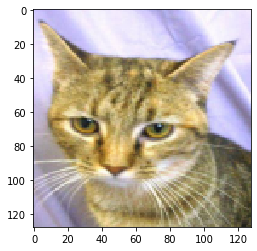

In [100]:
plt.imshow(X_test_array[825])
print("Animal Class:", predictions[825])

<a style= 'color:blue'> Let see some of the dogs that was predicted with no error:


In [197]:
compare[compare['predictions']==1]


,predictions,real,dif
37,1.0,1,0.0
484,1.0,1,0.0
488,1.0,1,0.0
757,1.0,1,0.0
796,1.0,1,0.0
884,1.0,1,0.0
1063,1.0,1,0.0
1139,1.0,1,0.0
1233,1.0,1,0.0
1383,1.0,1,0.0


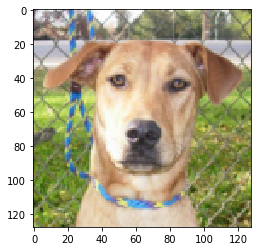

In [200]:
plt.imshow(X_test_array[37])


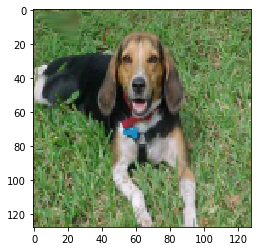

In [201]:
plt.imshow(X_test_array[2510])


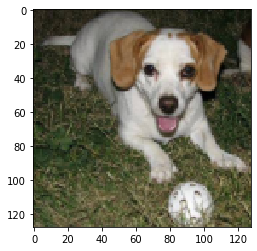

In [202]:
plt.imshow(X_test_array[4577])


<a style= 'color:blue'> To analize the errors we have to take into account the next considerations:
- We know that class 1 is for dogs and 0 for cats. When we made our prediction matrix the values fluctuate from 0 to 1. 
- The values obtained not only tell us if the photo has a dog or a cat but also the probabilites to be of one class or another. In the dataset created above we can see the real value, the predicted value and the difference between one and other. 
- To this analysis we will consider errors, those amounts where the differences are higher to 0.51, this means that we will consider an error if the model think that it is more probable that the photo has the incorrect class. In the case of dogs if the difference is higher to 0.51, it means that the model predicted that it has more than 51% of probabilites of being a cat.
- The same for cats, we will consider errors, those amounts were the differences is greater than -0.51, this means that in photos with a cat our model predicted that it has more than 51% of probabilites of being a dog.
Let see what kind of images are these to find some patterns that confuse the model.

In [204]:
#Dogs that the model predicted as cats=352
compare.loc[(compare['dif'] >= 0.51) ]

,predictions,real,dif
2,0.081460,1,0.918540
14,0.388628,1,0.611372
15,0.441322,1,0.558678
20,0.268691,1,0.731309
36,0.330981,1,0.669019
...,...,...,...
4957,0.372590,1,0.627410
4972,0.414474,1,0.585526
4976,0.304893,1,0.695107
4988,0.486049,1,0.513951


<a style= 'color:blue'> We can see that there are 352 pictures were the error is higher to 0.51. It means where the model predicted that this was more a cat than a dog

Probability of being a dog: 38.86%


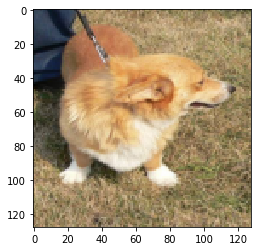

In [216]:
plt.imshow(X_test_array[14])
prob=round(((compare['predictions'][14])*100),2)
print(f'Probability of being a dog: {prob}%')

Probability of being a dog: 33.1%


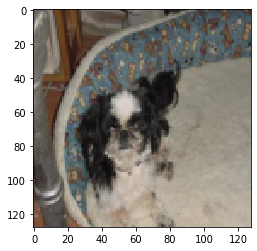

In [217]:
plt.imshow(X_test_array[36])
prob=round(((compare['predictions'][36])*100),2)
print(f'Probability of being a dog: {prob}%')

Probability of being a dog: 34.67%


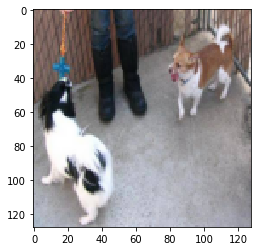

In [218]:
plt.imshow(X_test_array[4905])
prob=round(((compare['predictions'][4905])*100),2)
print(f'Probability of being a dog: {prob}%')

<a style= 'color:blue'> Let see now pictures with an error higher than 0.9

In [185]:
compare.loc[(compare['dif'] >= 0.9) ]


,predictions,real,dif
2,0.081460,1,0.918540
613,0.052911,1,0.947089
620,0.073821,1,0.926179
779,0.097911,1,0.902089
846,0.075268,1,0.924732
901,0.019511,1,0.980489
990,0.082721,1,0.917279
1030,0.027574,1,0.972426
1064,0.055584,1,0.944416
1200,0.079944,1,0.920056


Probability of being a dog: 9.19%


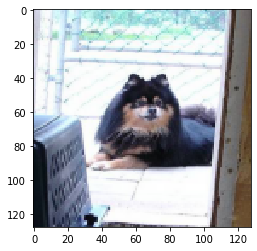

In [219]:
plt.imshow(X_test_array[3504])
prob=round(((compare['predictions'][3504])*100),2)
print(f'Probability of being a dog: {prob}%')

Probability of being a dog: 4.18%


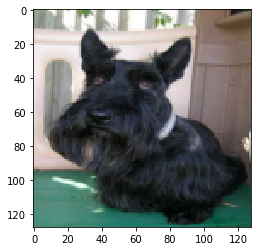

In [220]:
plt.imshow(X_test_array[3826])
prob=round(((compare['predictions'][3826])*100),2)
print(f'Probability of being a dog: {prob}%')

Probability of being a dog: 26.75%


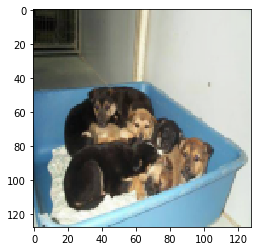

In [228]:
plt.imshow(X_test_array[555])
prob=round(((compare['predictions'][555])*100),2)
print(f'Probability of being a dog: {prob}%')

Probability of being a dog: 0.38%


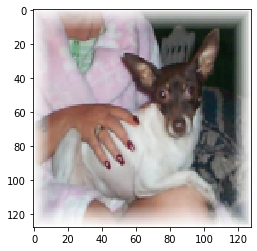

In [221]:
plt.imshow(X_test_array[4598])
prob=round(((compare['predictions'][4598])*100),2)
print(f'Probability of being a dog: {prob}%')

<a style= 'color:blue'> Let´s see what happened with cats

In [226]:
compare.loc[(compare['dif'] <= -0.51) & (compare['dif'] < 0) ]

,predictions,real,dif
8,0.687785,0,-0.687785
42,0.844350,0,-0.844350
72,0.698186,0,-0.698186
77,0.739459,0,-0.739459
137,0.821590,0,-0.821590
...,...,...,...
4826,0.548877,0,-0.548877
4853,0.588051,0,-0.588051
4882,0.557642,0,-0.557642
4910,0.912700,0,-0.912700


<a style= 'color:blue'> We can see that there are 135 pictures were the error is higher to 0.51. It means where the model predicted that this was more a dog than a cat


Probability of being a cat: 38.12%


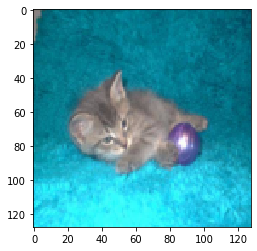

In [222]:
plt.imshow(X_test_array[4781])
prob=round((((1-compare['predictions'][4781]))*100),2)
print(f'Probability of being a cat: {prob}%')

Probability of being a cat: 31.22%


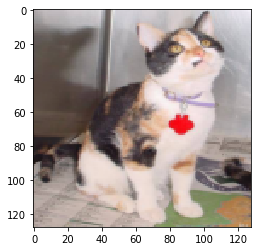

In [223]:
plt.imshow(X_test_array[8])
prob=round((((1-compare['predictions'][8]))*100),2)
print(f'Probability of being a cat: {prob}%')

<a style= 'color:blue'> Let´s see errors higher than 0.9 in cats



In [0]:
compare.loc[(compare['dif'] <= -0.9) & (compare['dif'] < 0) ]

,predictions,real,dif
970,0.931140,0,-0.931140
1020,0.967810,0,-0.967810
1150,0.934889,0,-0.934889
2002,0.948891,0,-0.948891
4349,0.906486,0,-0.906486
4787,0.963097,0,-0.963097
4910,0.912700,0,-0.912700


Probability of being a cat: 6.89%


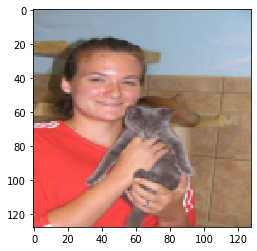

In [224]:
plt.imshow(X_test_array[970])
prob=round((((1-compare['predictions'][970]))*100),2)
print(f'Probability of being a cat: {prob}%')

Probability of being a cat: 3.22%


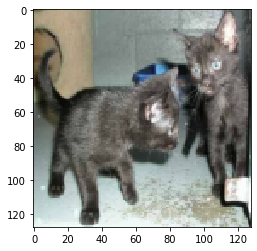

In [225]:
plt.imshow(X_test_array[1020])
prob=round((((1-compare['predictions'][1020]))*100),2)
print(f'Probability of being a cat: {prob}%')

<a style= 'color:blue'> 
CONCLUSIONS

The model has recognized only 27 dogs and 1 cat with 0 error. 

The only cat that the model recognized was in the foreground so it shows clearly the raised ears and the whiskers.

It recognize dogs better when the photos have no other elements, when the background is plain, when the dogs are looking to the camera and when them have floppy ears.

The model make mistakes when there are more elements in the photos, more than one animal, or people, or even if the animal is not looking directly to the camera and it is showing its side face.

Even the model is predicting with no errors more dogs than cats, it is also making more mistakes in predicting dogs. It predicted 352 times that it was a cat when it was a dog and 135 times that it was a dog when it was a cat.

There are photos were is not possible to recognize even for me if there is a dog or a cat. So this are not considering real errors.

But it is a pattern that when there are more elements in the photo it is more difficult for the model to recognize the correct class. The training test must include more photos with elements so it can improve this in test too. 

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Write a small report summarizing the network choices you have tried, what worked and what didn't. What have you learned from this experience?</font>

***

<a style= 'color:blue'> To start, we have run a model with only 1 convolutional layer, and 2 dense layers, this model didn´t give pretty good results. And it overfitted a lot. 

Then we have added 3 convolutional layers, though each one adds more computation expenses, with this we tipically add the number of filters so the model can learn more complex representations.

We have added 2 pooling layers, It's important not to have too many pooling layers, as each pooling discards some data. Pooling too often will lead to there being almost nothing for the densely connected layers to learn about when the data reaches them.

In this case, since the images are small we didn't pool more than twice.

Then we added the first Dense layer. Here we added a kernel constraint to regularize the data as it learns, another thing that helps prevent overfitting. And finally the last dense layer with one neuron as this is a binomial classifier model.

We added dropout in all our layers too, at the begining we run a model without dropout in all the layers and it was overfitting, after add dropout we obtain a pretty good accuracy and the model was not overfitting as we can see in the metrics above (91.83% for train and 85.92% for test). 

Finally the model was improved using the pretrained model VGG16, frizing all the convolutional layers and adding 3 more dense layers. Also we included early stopping to know the correct epochs that obtain the better accuracy and not overfit. The model stops in 3 epochs, achiving 90% in test and 92% in train. And loss of 0.24

The difference between the model that i obtained with the VGG16 are the layers, VGG16 include as the name say 16 layers, in terms of accuracy it doesnt grow that much, comparing that i used only 4 layers and obtained a 85% and with 12 more we only grow 5 porcentual points. But the real advantage at running VGG16 are the computional costs, as the layers were frized the model only train with the last dense layers, and that is an optimization of computational costs.
